/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

异常数据发现：
                  gift_amount          
                        count       sum
gift_amount_level                      
1                       90666  280657.0
2                       16880  584100.0
3                        1144  504735.0
异常数据明细
        user_id  creator_id  gift_amount        time
84633  16258989    12256260       1000.0  1581665742
        user_id  creator_id  gift_amount        time
91650  12256260    16258989       1000.0  1581658755
用户性别打赏分布：


No handles with labels found to put in legend.


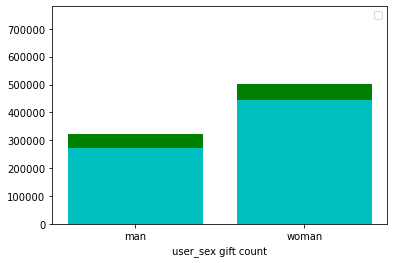

No handles with labels found to put in legend.


用户设备打赏分布：


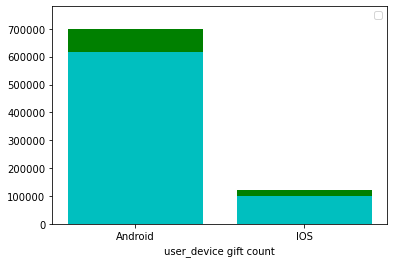

用户注册时间打赏分布：


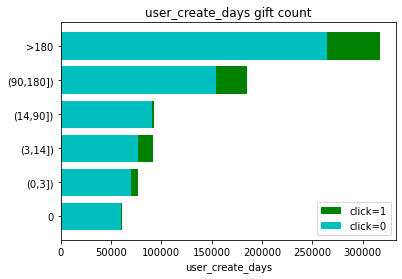

No handles with labels found to put in legend.


音频发布者性别打赏分布 ：


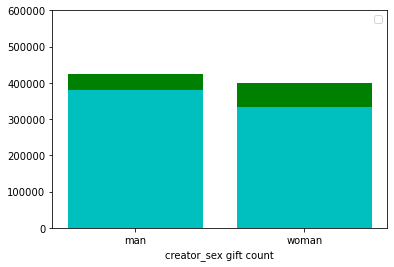

音频发布者粉丝数打赏分布：


No handles with labels found to put in legend.


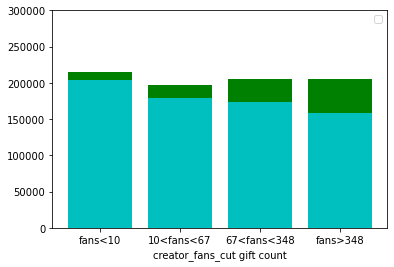

音频发布时间打赏分布：


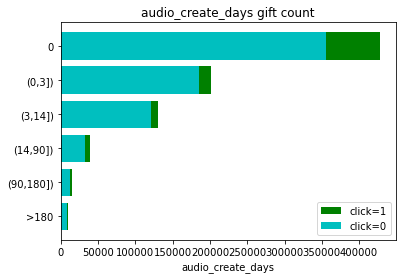

用户行为时间打赏分布：


No handles with labels found to put in legend.


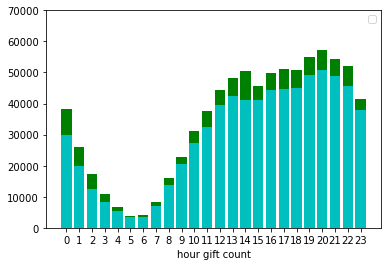

构造统计特征数据分布：
       audio_song_name_label_sum  audio_song_name_label_rate  \
count              823277.000000               823277.000000   
mean                  286.985248                    0.132021   
std                   480.840143                    0.157998   
min                     0.000000                    0.000000   
25%                    47.000000                    0.045208   
50%                   143.000000                    0.089771   
75%                   294.000000                    0.152849   
max                  3627.000000                    1.000000   

       audio_id_is_like_sum  audio_id_is_like_rate  audio_id_play_time_sum  \
count         823277.000000          823277.000000           823277.000000   
mean              42.195339               0.254575              767.035735   
std              253.159512               0.317957             3510.902421   
min                0.000000               0.000000                0.000000   
25%                0.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


auc
0.8817536372590349 0.8822188271470726


In [1]:
import pandas as pd
from utils import getAmountLevel,time_cut,fans_cut,draw1,draw2,auc

#----------------------数据观察与清洗------------------------------------
data=pd.read_csv("data.csv")

#异常数据发现
gift_data=data[data.gift_amount>0]
gift_data['gift_amount_level']=gift_data.gift_amount.apply(lambda t :getAmountLevel(t))
print("异常数据发现：")
print(gift_data[['gift_amount_level','gift_amount']].groupby(['gift_amount_level']).agg(['count','sum']))
#疑似刷单数据,进行删除
print("异常数据明细")
print(gift_data[(gift_data.user_id==16258989)&(gift_data.gift_amount==1000)].drop_duplicates()[['user_id','creator_id','gift_amount','time']])
print(gift_data[(gift_data.user_id==12256260)&(gift_data.gift_amount==1000)].drop_duplicates()[['user_id','creator_id','gift_amount','time']])
#data=data[data.user_id!=16258989]
#获取label
data['label']=data.gift_amount.map(lambda t : 1 if t>0 else 0)

#---------------------特征与label相关性可视化分析------------------------

#user_sex 用户性别打赏分布
fea_values=["man","woman"]
fea='user_sex'
print("用户性别打赏分布：")
draw1(data,fea_values,fea)
#user_device 用户设备打赏分布
fea_values=["Android","IOS"]
fea='user_device'
print("用户设备打赏分布：")
draw1(data,fea_values,fea)
#user_create_days 用户注册时间打赏分布
import datetime    
data[['user_create_time','audio_create_time','time']]=data[['user_create_time','audio_create_time','time']].astype('int')
data['user_create_days']=data['time']-data['user_create_time']
data['user_create_days_cut']=data.user_create_days.map(lambda t :time_cut(int(t/86400))[0])
data['user_create_days_rank']=data.user_create_days.map(lambda t :time_cut(int(t/86400))[1])
data['audio_create_days']=data['time']-data['audio_create_time']
data['audio_create_days_cut']=data.audio_create_days.map(lambda t :time_cut(int(t/86400))[0])
data['audio_create_days_rank']=data.audio_create_days.map(lambda t :time_cut(int(t/86400))[1])
fea_values=['user_create_days_cut','user_create_days_rank']
fea="user_create_days"
print("用户注册时间打赏分布：")
draw2(data,fea_values,fea,False)


#creator_sex 音频发布者性别打赏分布 
fea_values=["man","woman"]
fea='creator_sex'
print("音频发布者性别打赏分布 ：")
draw1(data,fea_values,fea,600000)

#creator_fans_cut 音频发布者粉丝数打赏分布
data['creator_fans_cut']=data.creator_fans.map(lambda t : fans_cut(t))
fea_values=["fans<10","10<fans<67","67<fans<348","fans>348"]
fea='creator_fans_cut'
print("音频发布者粉丝数打赏分布：")
draw1(data,fea_values,fea,300000)

#audio_create_days_cut 音频发布时间打赏分布
fea_values=['audio_create_days_cut','audio_create_days_rank']
fea="audio_create_days"
print("音频发布时间打赏分布：")
draw2(data,fea_values,fea,True)

#hour 用户行为时间打赏分布
data['time_cut']=data.time.map(lambda t :datetime.datetime.fromtimestamp(t).strftime("%Y-%m-%d %H:%M:%S"))
data['hour']=data.time_cut.map(lambda t : t[10:13])
fea_values=[str(i) for i in range(24)]
fea='hour'
print("用户行为时间打赏分布：")
draw1(data,fea_values,fea,70000)


#---------------------统计特征构造-------------------------------------
#音频、歌曲、歌手打赏次数特征构造
def get_feature(fea,values):
    agg_df_sum=data[[fea]+values].groupby([fea]).sum().reset_index()
    agg_df_sum.columns=[fea]+[fea+"_"+i+"_sum" for i in values]
    agg_df_count=data[[fea]+values].groupby([fea]).count().reset_index()
    agg_df_count.columns=[fea]+[fea+"_"+i+"_count" for i in values]
    agg_df=agg_df_count.merge(agg_df_sum,on=[fea])
    return agg_df,agg_df_sum.columns,agg_df_count.columns

values=["label","is_like","play_time"]
rate_columns,sum_columns,count_columns=[],[],[]
for value in values:
    rate_columns+=[  i+"_"+value+"_rate" for i in ["audio_id","audio_singer_name","audio_song_name"]]
    sum_columns+=[  i+"_"+value+"_sum" for i in ["audio_id","audio_singer_name","audio_song_name"]]
    count_columns+=[  i+"_"+value+"_count" for i in ["audio_id","audio_singer_name","audio_song_name"]]


audio_fea,audio_sum_columns,audio_count_columns=get_feature("audio_id",values)
singer_fea,singer_sum_columns,singer_count_columns=get_feature("audio_singer_name",values)
song_fea,song_sum_columns,song_count_columns=get_feature("audio_song_name",values)
data=data.merge(audio_fea,on=['audio_id'],how="left").merge(singer_fea,on=['audio_singer_name'],how="left").merge(song_fea,on=['audio_song_name'],how="left")

#音频、歌曲、歌手打赏率特征构造
for i in range(len(rate_columns)):
    data[rate_columns[i]]=data[sum_columns[i]]/data[count_columns[i]]

#获取所有的统计特征
agg_features=data[rate_columns+sum_columns]
print("构造统计特征数据分布：")
print(agg_features.fillna(0)[['audio_song_name_label_sum','audio_song_name_label_rate',"audio_id_is_like_sum",\
                              "audio_id_is_like_rate","audio_id_play_time_sum","audio_id_play_time_rate"]].describe())
#---------------------逻辑回归模型构建----------------------------------
from sklearn.metrics import accuracy_score

tmp=data[['user_id','audio_id','user_sex','user_device','user_create_days_cut','creator_sex','creator_fans_cut','audio_create_days_cut',\
          'hour','label']]
for i in tmp.columns[:-1]:
    tmp[i]=tmp[i].astype('str')
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split
#离散变量one-hot
X=pd.get_dummies(tmp.iloc[:,2:-1])
X=pd.concat([X,agg_features],axis=1).fillna(0)
X_train,X_test,y_train,y_test=train_test_split(X,tmp['label'],test_size=0.25,random_state=33)  #编号没有进入训练
lr = LogisticRegression(max_iter=200,C=0.01,penalty='l2')   # 初始化LogisticRegression
lr.fit(X_train,y_train)   # 使用训练集对测试集进行训练
from sklearn.metrics import classification_report
lr_y_train_predit=lr.predict_proba(X_train)[:,1]
lr_y_test_predit=lr.predict_proba(X_test)[:,1]  # 使用逻辑回归函数对测试集进行预测
train_auc=auc(y_train,lr_y_train_predit)
test_auc=auc(y_test,lr_y_test_predit)
print("auc")
print(train_auc,test_auc)